In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Lasso
import numpy as np


In [ ]:
df = pd.read_csv('/content/도로위험지수.csv')
df.head()

,도로명,사망자수,중상자수,경상자수,부상자수,사상자환산계수,사상자수,도로위험도,도로위험지수
0,가락마을6단지 602동 맞은편,0,5,11,0,0.6588,16,2.7452,27.452
1,내평지하차도 사거리,0,3,12,0,0.4320,15,2.3800,23.800
2,다빛초등학교 삼거리 (종촌동 585-6 ),0,7,27,0,1.0012,34,1.9876,19.876
3,대평동 264-30번지 사거리,0,5,11,1,0.6621,17,0.8265,8.265
4,번암사거리(번암리 161-1),0,2,11,0,0.3084,13,0.5000,5.000


In [ ]:
from sklearn import linear_model as lm
import sklearn.model_selection

model = lm.LinearRegression()

In [ ]:
x= df[['사망자수','중상자수','경상자수','부상자수','사상자환산계수','사상자수']]
y= df['도로위험지수']

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size = 0.2,random_state=1)
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.602288196699509
0.5043587905552916


In [ ]:
y_pred = model.predict(x)

In [ ]:
y[:5] , y_pred[:5]

(0    27.452
 1    23.800
 2    19.876
 3     8.265
 4     5.000
 Name: 도로위험지수, dtype: float64,
 array([11.40663018,  8.21529135, 23.33751722, 12.05559339,  5.84848532]))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

In [ ]:
model_ridge = make_pipeline(StandardScaler(),Ridge())
model_ridge.fit(x_train,y_train)
print(model_ridge.score(x_train,y_train))
print(model_ridge.score(x_test,y_test))

yr_pred = model_ridge.predict(x)
y[:5] , yr_pred[:5]

0.6020748725543273
0.5048538410805233


(0    27.452
 1    23.800
 2    19.876
 3     8.265
 4     5.000
 Name: 도로위험지수, dtype: float64,
 array([11.41442028,  8.24871458, 23.18580306, 12.10495441,  5.90653728]))

In [ ]:
model5_ridge = make_pipeline(StandardScaler(),Ridge(alpha=5))
model5_ridge.fit(x_train,y_train)
print(model5_ridge.score(x_train,y_train))
print(model5_ridge.score(x_test,y_test))

yr_pred = model5_ridge.predict(x)
y[:5] , yr_pred[:5]

0.597931234307082
0.5102063883568368


(0    27.452
 1    23.800
 2    19.876
 3     8.265
 4     5.000
 Name: 도로위험지수, dtype: float64,
 array([11.43682167,  8.39338156, 22.61828806, 12.23489425,  6.15360036]))

In [ ]:
model10_ridge = make_pipeline(StandardScaler(),Ridge(alpha=10))
model10_ridge.fit(x_train,y_train)
print(model10_ridge.score(x_train,y_train))
print(model10_ridge.score(x_test,y_test))

yr_pred = model10_ridge.predict(x)
y[:5] , yr_pred[:5]

0.5880920457218046
0.518280424274919


(0    27.452
 1    23.800
 2    19.876
 3     8.265
 4     5.000
 Name: 도로위험지수, dtype: float64,
 array([11.45230327,  8.57486303, 21.97861407, 12.30810786,  6.46124256]))

In [ ]:
model_lasso = Lasso(alpha=0.5)
model_lasso.fit(x_train,y_train)
print(model_lasso.score(x_train,y_train))
print(model_lasso.score(x_test,y_test))

yr_pred = model_lasso.predict(x)
y[:5] , yr_pred[:5]

0.5717990889703077
0.447439906728926


(0    27.452
 1    23.800
 2    19.876
 3     8.265
 4     5.000
 Name: 도로위험지수, dtype: float64,
 array([12.02607632,  8.60450251, 24.36876395, 12.75196058,  6.1065585 ]))

In [ ]:
model_elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
model_elastic.fit(x_train,y_train)
print(model_elastic.score(x_train,y_train))
print(model_elastic.score(x_test,y_test))

yr_pred = model_elastic.predict(x)
y[:5] , yr_pred[:5]

0.6019733955878389
0.4946876167463353


(0    27.452
 1    23.800
 2    19.876
 3     8.265
 4     5.000
 Name: 도로위험지수, dtype: float64,
 array([11.45204004,  8.22305867, 23.40255698, 12.183244  ,  5.83902073]))

In [ ]:
# 릿지 회귀

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso

x= df[['사망자수','중상자수','경상자수','부상자수','사상자환산계수','사상자수']]
y= df['도로위험지수']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y)

ridge = Ridge().fit(x_train, y_train)

ridge10 = Ridge(alpha=10).fit(x_train, y_train)

ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(x_train, y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(ridge.score(x_test, y_test)))

print("사용한 특성의 수 : {}".format(np.sum(ridge.coef_ != 0)))

print("사용한 max_iter : {}".format(ridge.n_iter_))

훈련 세트의 정확도 : 0.64
테스트 세트의 정확도 : 0.37
사용한 특성의 수 : 6
사용한 max_iter : None


In [ ]:
# 라쏘

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso

x= df[['사망자수','중상자수','경상자수','부상자수','사상자환산계수','사상자수']]
y= df['도로위험지수']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y)

lasso = Lasso().fit(x_train, y_train)



print("훈련 세트의 정확도 : {:.2f}".format(lasso.score(x_train, y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(lasso.score(x_test, y_test)))

print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))

print("사용한 max_iter : {}".format(lasso.n_iter_))

훈련 세트의 정확도 : 0.65
테스트 세트의 정확도 : -0.04
사용한 특성의 수 : 3
사용한 max_iter : 67


In [ ]:
# 라쏘
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso

x= df[['사망자수','중상자수','경상자수','부상자수','사상자환산계수','사상자수']]
y= df['도로위험지수']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y)

lasso = Lasso().fit(x_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(lasso.score(x_train, y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(lasso.score(x_test, y_test)))

print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))

print("사용한 max_iter : {}".format(lasso.n_iter_))

훈련 세트의 정확도 : 0.49
테스트 세트의 정확도 : -3.41
사용한 특성의 수 : 3
사용한 max_iter : 162


In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(x_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(lasso001.score(x_train, y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(lasso001.score(x_test, y_test)))

print("사용한 특성의 수 : {}".format(np.sum(lasso001.coef_ != 0)))

print("사용한 max_iter : {}".format(lasso001.n_iter_))

훈련 세트의 정확도 : 0.59
테스트 세트의 정확도 : -1.80
사용한 특성의 수 : 3
사용한 max_iter : 1482


In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(x_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(lasso00001.score(x_train, y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(lasso00001.score(x_test, y_test)))

print("사용한 특성의 수 : {}".format(np.sum(lasso00001.coef_ != 0)))

print("사용한 max_iter : {}".format(lasso00001.n_iter_))

훈련 세트의 정확도 : 0.59
테스트 세트의 정확도 : -1.78
사용한 특성의 수 : 6
사용한 max_iter : 4581


In [ ]:
# 모델에 기여하는 변수 확인
coef = pd.DataFrame({'feature_names':x.columns, 'coefficient' : model.coef_})
coef

,feature_names,coefficient
0,사망자수,7.724808
1,중상자수,-1.473318
2,경상자수,-1.983288
3,부상자수,-1.822049
4,사상자환산계수,7.533225
5,사상자수,2.446153


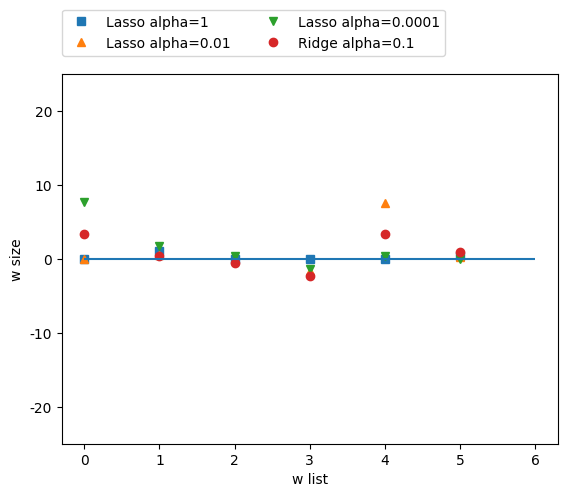

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge

x= df[['사망자수','중상자수','경상자수','부상자수','사상자환산계수','사상자수']]
y= df['도로위험지수']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y)

# 릿지 회귀

ridge = Ridge().fit(x_train, y_train)

ridge10 = Ridge(alpha=10).fit(x_train, y_train)

ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)



# 라쏘 회귀

lasso = Lasso().fit(x_train, y_train)

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(x_train, y_train)

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(x_train, y_train)



plt.plot(lasso.coef_, 's', label="Lasso alpha=1")

plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")

plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")



plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))

plt.xlabel("w list")

plt.ylabel("w size")

plt.hlines(0, 0, len(coef))

plt.ylim(-25, 25)



plt.show()

In [ ]:
# 모델에 기여하는 변수 확인
coef = pd.DataFrame({'feature_names':x.columns, 'coefficient' : model.coef_})
coef

,feature_names,coefficient
0,사망자수,7.724808
1,중상자수,-1.473318
2,경상자수,-1.983288
3,부상자수,-1.822049
4,사상자환산계수,7.533225
5,사상자수,2.446153


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

<Axes: xlabel='feature_names', ylabel='coefficient'>

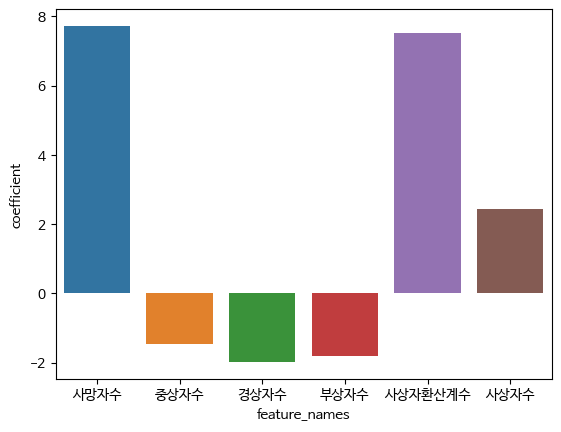

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

sns.barplot(x='feature_names',y='coefficient',data=coef)

###### 클러스터링 군집분석

In [ ]:
cc= df[['사망자수','중상자수','경상자수','부상자수','사상자환산계수','사상자수']]

In [ ]:
cc.head()

,사망자수,중상자수,경상자수,부상자수,사상자환산계수,사상자수
0,0,5,11,0,0.6588,16
1,0,3,12,0,0.4320,15
2,0,7,27,0,1.0012,34
3,0,5,11,1,0.6621,17
4,0,2,11,0,0.3084,13


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 표준화
sc = StandardScaler()
cc_scaled = sc.fit_transform(cc)
pd.DataFrame(cc_scaled)

,0,1,2,3,4,5
0,-0.277350,0.225813,0.340620,-0.363422,-0.032558,0.300541
1,-0.277350,-0.827981,0.567700,-0.363422,-0.648089,0.113538
2,-0.277350,1.279607,3.973902,-0.363422,0.896709,3.666606
3,-0.277350,0.225813,0.340620,1.090266,-0.023602,0.487545
4,-0.277350,-1.354878,0.340620,-0.363422,-0.983537,-0.260469
5,-0.277350,-1.881775,0.794780,-0.363422,-1.263620,-0.073466
6,-0.277350,-0.827981,-0.567700,1.090266,-0.731408,-0.634476
7,-0.277350,-0.301084,-0.794780,-0.363422,-0.441826,-0.821480
8,-0.277350,0.225813,0.113540,3.997641,-0.024145,0.674549
9,3.605551,0.225813,-0.340620,-0.363422,2.626057,-0.073466


In [ ]:
# cc_scaled 데이터를 넣어 클러스터링
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(cc_scaled)

# 클러스터링 변수인 clusters값을 원본데이터에 넣기
cc['cluster'] = clusters.labels_
cc.head()

,사망자수,중상자수,경상자수,부상자수,사상자환산계수,사상자수,cluster
0,0,5,11,0,0.6588,16,0
1,0,3,12,0,0.4320,15,3
2,0,7,27,0,1.0012,34,2
3,0,5,11,1,0.6621,17,0
4,0,2,11,0,0.3084,13,3


In [ ]:
cc.groupby('cluster').count()

,사망자수,중상자수,경상자수,부상자수,사상자환산계수,사상자수
cluster,,,,,,
0,9,9,9,9,9,9
1,2,2,2,2,2,2
2,1,1,1,1,1,1
3,16,16,16,16,16,16


In [ ]:
# 그룹별 평균값
cc.groupby('cluster').mean()

,사망자수,중상자수,경상자수,부상자수,사상자환산계수,사상자수
cluster,,,,,,
0,0.0,6.333333,10.777778,0.444444,0.814489,17.555556
1,1.0,5.500000,9.500000,1.000000,1.710300,17.000000
2,0.0,7.000000,27.000000,0.000000,1.001200,34.000000
3,0.0,3.312500,7.687500,0.062500,0.439381,11.062500


In [ ]:
from sklearn.decomposition import PCA
X=cc_scaled.copy()

#객체
pca = PCA(n_components=2)

#적용
pca.fit(X)
X_pca = pca.transform(X)
X_pca

array([[ 0.2012198 ,  0.59792685],
       [-0.58628336,  0.81018487],
       [ 4.22604575,  3.61143844],
       [ 0.60170571,  0.21430125],
       [-1.26568107,  0.63168715],
       [-1.37378653,  1.02244288],
       [-1.13795122, -0.5221965 ],
       [-1.23990092, -0.33957548],
       [ 1.21224677, -0.74270112],
       [ 2.34399724, -3.08235931],
       [-0.64282851, -0.74158465],
       [ 4.20522827, -3.2916105 ],
       [-1.83697333,  0.06243369],
       [ 0.98872296,  0.38566884],
       [-1.53843713, -0.1385709 ],
       [-2.21783484, -0.31706862],
       [-0.96714487,  0.43068256],
       [ 2.23941293,  1.13342002],
       [ 0.2012198 ,  0.59792685],
       [ 1.09682841, -0.0050869 ],
       [-0.66860866,  0.22967798],
       [-1.91929863, -0.5180732 ],
       [-0.85903942,  0.03992683],
       [-1.62076243, -0.71907779],
       [-0.85903942,  0.03992683],
       [-0.94136472, -0.54058006],
       [ 0.90639766, -0.19483805],
       [ 1.45190976,  1.34567803]])

In [ ]:
pca_df = pd.DataFrame(X_pca)
pca_df['cluster'] = cc['cluster']
pca_df.head()

,0,1,cluster
0,0.201220,0.597927,0
1,-0.586283,0.810185,3
2,4.226046,3.611438,2
3,0.601706,0.214301,0
4,-1.265681,0.631687,3


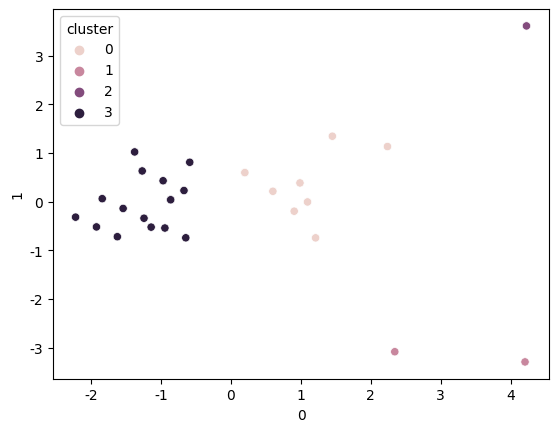

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(x=pca_df[0],y=pca_df[1],hue='cluster',data=pca_df)

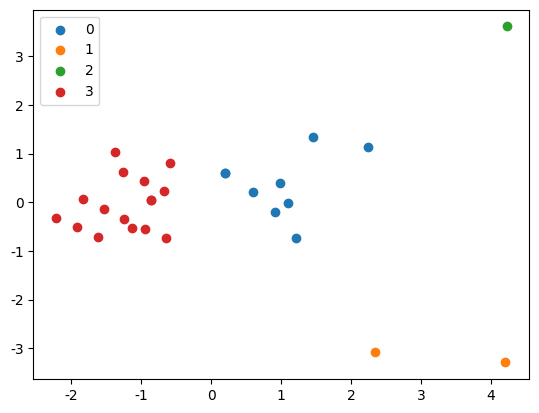

In [ ]:
for i in sorted(pca_df['cluster'].unique()):
  tmp = pca_df.loc[pca_df['cluster']==i]
  plt.scatter(tmp[0],tmp[1])
  plt.legend(sorted(pca_df['cluster'].unique()))